<a href="https://colab.research.google.com/github/ganesh2512/DSBA/blob/master/AML_Group_Project_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/DR_Demo_Employee_Attrition.csv')

In [ ]:
#keepling only the neccessary columns
data_performance_review = data[['performance_review']]
data_performance_review.head(5)

,performance_review
0,"Teamwork Satisfactory he gives candid, con..."
1,\rTeamwork Exceeds requirements\rHe gi...
2,Cooperation Meets requirements\rS...
3,Problem Solving Satisfactory\rhe rout...
4,Goals: Goal: Incorporate Team Members Category...


In [ ]:
#check the length of the document
len(data_performance_review)

5740

In [ ]:
#drop na
data_performance_review = data_performance_review.dropna()
len(data_performance_review)

5740

In [ ]:
#change performance_review to str
data_performance_review['performance_review'] = data_performance_review['performance_review'].astype(str)

In [ ]:
#lower case
data_performance_review['performance_review'] = data_performance_review['performance_review'].str.lower()
data_performance_review['performance_review'].head(5)

0    teamwork     satisfactory he gives candid, con...
1    \rteamwork         exceeds requirements\rhe gi...
2    cooperation              meets requirements\rs...
3    problem solving          satisfactory\rhe rout...
4    goals: goal: incorporate team members category...
Name: performance_review, dtype: object

In [ ]:
#remove punctuations
import string
punct_to_remove = string.punctuation
punct_to_remove

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punct_to_remove))

In [ ]:
data_performance_review["text_wo_punct"] = data_performance_review['performance_review'].apply(lambda text: remove_punctuation(text))
data_performance_review.head()

,performance_review,text_wo_punct
0,"teamwork satisfactory he gives candid, con...",teamwork satisfactory he gives candid cons...
1,\rteamwork exceeds requirements\rhe gi...,\rteamwork exceeds requirements\rhe gi...
2,cooperation meets requirements\rs...,cooperation meets requirements\rs...
3,problem solving satisfactory\rhe rout...,problem solving satisfactory\rhe rout...
4,goals: goal: incorporate team members category...,goals goal incorporate team members category p...


In [ ]:
#remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))  

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
STOPWORDS = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data_performance_review["text_wo_stop"] = data_performance_review["text_wo_punct"].apply(lambda text: remove_stopwords(text))
data_performance_review.head()

,performance_review,text_wo_punct,text_wo_stop
0,"teamwork satisfactory he gives candid, con...",teamwork satisfactory he gives candid cons...,teamwork satisfactory gives candid constructiv...
1,\rteamwork exceeds requirements\rhe gi...,\rteamwork exceeds requirements\rhe gi...,teamwork exceeds requirements gives candid con...
2,cooperation meets requirements\rs...,cooperation meets requirements\rs...,cooperation meets requirements takes active ro...
3,problem solving satisfactory\rhe rout...,problem solving satisfactory\rhe rout...,problem solving satisfactory routinely researc...
4,goals: goal: incorporate team members category...,goals goal incorporate team members category p...,goals goal incorporate team members category p...


In [ ]:
#steming - example: gives to give
from nltk.stem.porter import PorterStemmer
data_performance_review.drop(['performance_review','text_wo_punct'], axis=1, inplace=True)

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [ ]:
data_performance_review["text_stemmed"] = data_performance_review["text_wo_stop"].apply(lambda text: stem_words(text))
data_performance_review.head(5)

,text_wo_stop,text_stemmed
0,teamwork satisfactory gives candid constructiv...,teamwork satisfactori give candid construct fe...
1,teamwork exceeds requirements gives candid con...,teamwork exce requir give candid construct fee...
2,cooperation meets requirements takes active ro...,cooper meet requir take activ role resolv conf...
3,problem solving satisfactory routinely researc...,problem solv satisfactori routin research opti...
4,goals goal incorporate team members category p...,goal goal incorpor team member categori plan o...


In [ ]:
#lemmatization - example:running to run
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
data_performance_review["text_lemmatized"] = data_performance_review["text_stemmed"].apply(lambda text: lemmatize_words(text))
data_performance_review.head(5)

,text_wo_stop,text_stemmed,text_lemmatized
0,teamwork satisfactory gives candid constructiv...,teamwork satisfactori give candid construct fe...,teamwork satisfactori give candid construct fe...
1,teamwork exceeds requirements gives candid con...,teamwork exce requir give candid construct fee...,teamwork exce requir give candid construct fee...
2,cooperation meets requirements takes active ro...,cooper meet requir take activ role resolv conf...,cooper meet requir take activ role resolv conf...
3,problem solving satisfactory routinely researc...,problem solv satisfactori routin research opti...,problem solv satisfactori routin research opti...
4,goals goal incorporate team members category p...,goal goal incorpor team member categori plan o...,goal goal incorpor team member categori plan o...


In [ ]:
#wordcloud
import numpy as np
from wordcloud import WordCloud

In [ ]:
text = data_performance_review['text_lemmatized'].values 
wordcloud = WordCloud(width=1200, height=1200, max_words=200).generate(str(text))

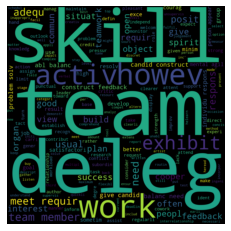

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()